In [8]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [9]:
# Загрузка подготовленного набора данных
dataset = pandas.read_csv('prepared_data.csv') # Убедиться в правильности пути к файлу!
dataset.head(10) # Вывод первых 10 строк

,Unnamed: 0,MMIN,CHMAX,2,4,5,6,8
0,0,0.251074,1.000000,0.489650,0.730638,1.000000,0.894427,0.759257
1,1,0.874463,0.676123,0.131078,1.000000,0.421637,0.632456,0.825801
2,2,0.874463,0.676123,0.131078,1.000000,0.421637,0.632456,0.782136
3,3,0.874463,0.676123,0.131078,1.000000,0.421637,0.632456,0.728689
4,4,0.874463,0.478091,0.131078,0.888465,0.421637,0.632456,0.671211
5,5,0.874463,0.676123,0.104278,1.000000,0.596285,0.632456,0.862138
6,6,1.000000,0.676123,0.074188,1.000000,0.596285,0.894427,0.893257
7,7,1.000000,0.676123,0.074188,1.000000,0.596285,0.894427,0.955579
8,8,1.000000,0.676123,0.074188,1.000000,0.596285,0.894427,1.000000
9,9,1.000000,0.956183,0.074188,1.000000,0.843274,1.000000,1.000000


In [10]:
Xx = dataset.iloc[:, [*range(1,7)]]
Xx.head(10)

,MMIN,CHMAX,2,4,5,6
0,0.251074,1.000000,0.489650,0.730638,1.000000,0.894427
1,0.874463,0.676123,0.131078,1.000000,0.421637,0.632456
2,0.874463,0.676123,0.131078,1.000000,0.421637,0.632456
3,0.874463,0.676123,0.131078,1.000000,0.421637,0.632456
4,0.874463,0.478091,0.131078,0.888465,0.421637,0.632456
5,0.874463,0.676123,0.104278,1.000000,0.596285,0.632456
6,1.000000,0.676123,0.074188,1.000000,0.596285,0.894427
7,1.000000,0.676123,0.074188,1.000000,0.596285,0.894427
8,1.000000,0.676123,0.074188,1.000000,0.596285,0.894427
9,1.000000,0.956183,0.074188,1.000000,0.843274,1.000000


In [11]:
# Выделение входных и выходных параметров:
# Выходной параметр - значение столбца обработанного набора данных, соответсвующее столбцу №8 из первоначального набора данных (machine.data.csv).
# Входные параметры - все остальные столбцы обработанного набора данных.
# Используем .values, чтобы индексы не попали в новые переменные и в дальнейшем не мешали нам, например, при построении графиков.
X = dataset.iloc[:, [*range(1,7)]].values
Y = dataset['8'].values

# Обратите внимание на структуру вашего обработанного файлы и измените индексы, если нужно.

In [12]:
# Разделение данных на обучающую и тестовую выборки:
# Используем метод train_test_split библиотеки sklearn.
# Он разделяет заданные массивы входных и выходных параметров на две части каждый.
# Значение test_size определяет долю тестовой выборки в исходных данных.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [13]:
# Задаем параметры структуры нейронной сети.

# Количество нейронов во входном слое должно быть равно количеству входных параметров.
input_layer_size = 6

# Количество нейронов в каждом скрытом слое и количество таких слоёв могут быть выбраны произвольно.
# Увеличение числа нейронов относительно предыдущего слоя позволяет лучше обрабатывать отдельные примеры.
# Уменьшение числа нейронов относительно предыдущего слоя позволяет обощать информацию и выводить новые правила.
# Увеличение числа слоёв помогает сети работать как более сложная функция.
first_hidden_layer_size = 50
second_hidden_layer_size = 50

# Количество нейронов в выходном слое должно быть равно количеству выходных параметров.
output_layer_size = 1
# Параметры обучения нейронной сети: количество эпох и размер батча.
epochs_number = 100
batch_size = 16

In [14]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [15]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
# Если внимательно посмотреть на количество параметров, т.е. связей между нейронами, то можно увидеть, что автоматически добавлены нейроны смещения.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                350       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,951
Trainable params: 2,951
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Настройка нейронной сети.
# Функция потерь (loss) - среднеквадратическая ошибка.
# Оптимизатор (optimizer) - adam (в настоящий момент - это стандартный оптимизатор).
# Указываем метрики средняя абсолютная ошибка (mean_absolute_error) и среднеквадратическая ошиба (mean_squared_error) для дальнейшего анализа.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [17]:
# Обучение нейронной сети.
# На вход передаем обучающие и тестовые выборки, количество эпох и размер батча.
# На выходе получаем объект с историей обучения, который далее будем анализировать.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 167 samples, validate on 42 samples
Epoch 1/100
167/167 [==============================] - 0s 2ms/step - loss: 0.1992 - mean_absolute_error: 0.3880 - mean_squared_error: 0.1992 - val_loss: 0.0763 - val_mean_absolute_error: 0.2313 - val_mean_squared_error: 0.0763
Epoch 2/100
167/167 [==============================] - 0s 214us/step - loss: 0.0327 - mean_absolute_error: 0.1392 - mean_squared_error: 0.0327 - val_loss: 0.0147 - val_mean_absolute_error: 0.1037 - val_mean_squared_error: 0.0147
Epoch 3/100
167/167 [==============================] - 0s 173us/step - loss: 0.0219 - mean_absolute_error: 0.1221 - mean_squared_error: 0.0219 - val_loss: 0.0105 - val_mean_absolute_error: 0.0851 - val_mean_squared_error: 0.0105
Epoch 4/100
167/167 [==============================] - 0s 211us/step - loss: 0.0119 - mean_absolute_error: 0.0876 - mean_squared_error: 0.0119 - val_loss: 0.0115 - val_mean_absolute_error: 0.0876 - val_mean_squared_error: 0.0115
Epoch 5/100
167/167 [====================

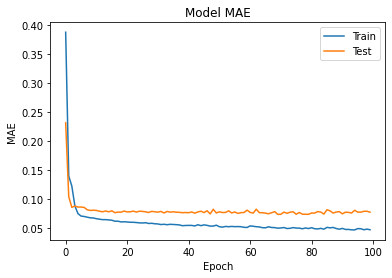

In [18]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

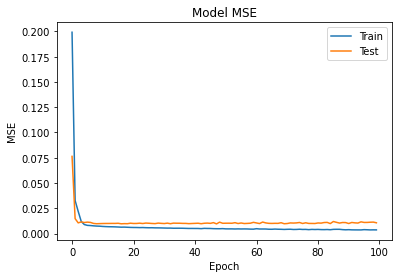

In [19]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
# Видно, что в процессе обучения сеть с каждой эпохой вычисляет всё более точные прогнозы значений Y.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [20]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

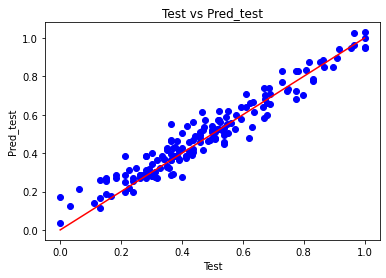

In [21]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
# В идеальной ситуации они должны совпадать, т.е. точки (Y_train[i], Y_pred_train[i]) должны лежать на прямой Y_train = Y_pred_train.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

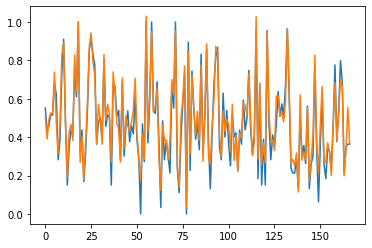

In [22]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [23]:
# Таким образом, обучение по обучающей выборке проведено.
# Теперь проверим работу нейроной сети на тестовой выборке.

# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

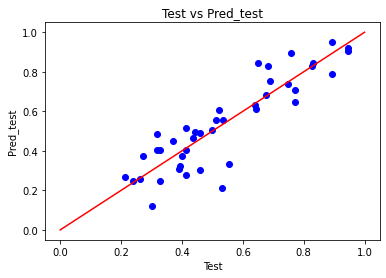

In [24]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

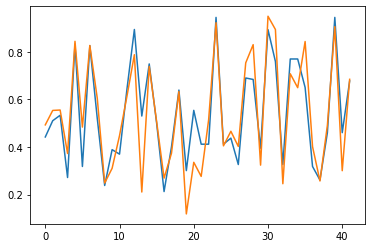

In [25]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [26]:
# Итого, качество работы нейронной сети на тестовых данных ниже, чем на обучающих - это ожидаемо.
# Тем не менее, нейронная сеть способна найти зависимости и предсказвать значение Y по X с приемлемым уровенм точности.

# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(numpy.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(numpy.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.061373251782450323
0.10299045787950759


In [27]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
# Для этого используем библиотеку scipy и метод stats.shapiro.
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.989585280418396, p = 0.2583715319633484
Test k = 0.9648491144180298, p = 0.21956554055213928


In [28]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9668104648590088, p_s = 7.92849823483266e-05
k_n = 27.26511346481646, p_n = 1.2007589624233411e-06


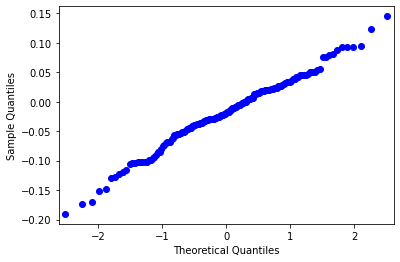

In [29]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

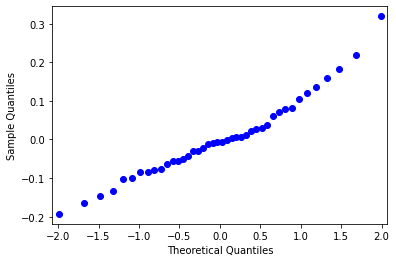

In [30]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

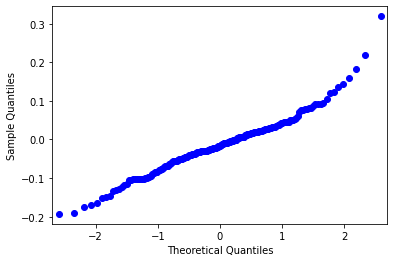

In [31]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

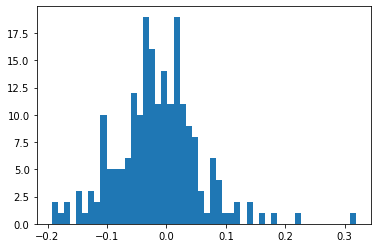

In [32]:
# Можо также визульно убедиться, что распределения "почти нормальное".
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [33]:
# Сохраним обученную нейронную сеть, название файла можно выбрать любое, расширение - h5.
model.save('SimpleNeuralNetwork.h5')